# Introdução à Programação em Física
# Prova 3

### Professor: Gustavo Guerrero

**Renomei esse arquivo colocando os nomes dos dois alunos da dupla**

Crie celulas abaixo de cada questão e responda sequencialmente.

## Alunos:
1. Nome: Anakin Dantas Rodrigues Matrícula: 2023033173   
2. Nome: Pedro Andrade Rodrigues Matrícula: 2023033289

### 1 (50 pts). Simulando o movimento de partículas aceleradas por um campo magnético

<img src="particle.png" width=40% >

A dinâmica de uma partícula carregada na presença de um campo magnético é dada pela seguinte equação de movimento (o problema é similar ao lançamento do projetil, exceto que a equação contém um produto vetorial).

$$
{\vec F} = m {\vec a} = e {\vec v} \times {\vec B} \;,
$$

Esse ponto consiste em resolver essa equação usando o método Runge-Kutta.

a) Escreva em Markdown/LaTex as componentes da equação acima para as velocidades e posições da partícula, no total 6 equações.

b) Escreva o programa principal, e o programa com as equações diferenciais necessários para simular o movimento das partículas entre $t=0$ e $t=0.02$ s.  Considere um passo temporal $dt = 5\times10^{-6}$ s.

Utilize como condições iniciais:  ${\vec r} = (0,-2.6,0)$,  ${\vec v} = (250,0,0.1)$. Considere, por fim, um campo magnético ${\vec B} = (0,0,0.5 \times 10^4)$

Rode seus programas usando a rotina Runge-Kutta para resolver o conjunto de 6 equações diferenciais ordinarias.  Grafique seus oesultados da posição da partícula usando

`from mpl_toolkits import mplot3d`

c) Grafique a posição $x$, de cada uma das partículas como função do tempo.  Compare seu gráfico com a primeira figura desse documento.  Grafique agora a superposição dessas duas posições.


## Questão 1

Vamos expressar as componentes desta equação em termos das coordenadas cartesianas. Suponha que a partícula está sujeita a um campo magnético \\
B = $(B_x, B_y, B_z)$
e tem uma velocidade \\
v = $(v_x, v_y, v_z)$.

As componentes da força F=$(F_x, F_y, F_z)$ também são consideradas. As massas da partícula e a carga elétrica são representadas por
m e e, respectivamente.

A equação de movimento é então dividida nas seguintes seis equações diferenciais:

1. $\textbf{Componente x da equação:}$ \\
$$
m\frac{dv_x}{dt} = e(B_zv_y − B_yv_z)
$$
2. $\textbf{Componente y da equação:}$ \\
$$
m\frac{dv_y}{dt} = e(B_xv_z − B_zv_x)
$$
3. $\textbf{Componente z da equação:}$ \\
$$
m\frac{dv_z}{dt} = e(B_yv_x − B_xv_y)
$$

Estas três equações representam as acelerações nas direções
x, y e z.
1. $\textbf{Componente x da equação para posição:}$ \\
$$
\frac{dx}{dt} = v_x
$$
2. $\textbf{Componente y da equação para posição:}$ \\
$$
\frac{dy}{dt} = v_y
$$
3. $\textbf{Componente z da equação para posição:}$ \\
$$
\frac{dz}{dt} = v_z
$$

Estas três últimas equações representam as velocidades nas direções
x, y e z.


In [165]:
import matplotlib.pylab as plt

In [171]:
def rk4 ( t0, u0, dt, f ):
    # Fazemos 4 avaliações da derivada
    # cada avaliação chama a funçao f e a avalia em instantes de tempo
    # avançados por h/2.
    f1 = f ( t0,            u0 )
    f2 = f ( t0 + dt / 2.0, u0 + dt * f1 / 2.0 )
    f3 = f ( t0 + dt / 2.0, u0 + dt * f2 / 2.0 )
    f4 = f ( t0 + dt,       u0 + dt * f3 )
    u1 = u0 + dt * ( f1 + 2.0 * f2 + 2.0 * f3 + f4 ) / 6.0
    return u1

In [172]:
def rk4_test1():
  #passo temporal
    dt = 5 * 1e-06
    t0 = 0.0
    tmax = 0.02
    r0 = np.array([0.0, -2.6, 0.0]) #posição inicial
    v0 = np.array([250.0, 0.0, 0.1]) #velocidade inicial

    t_num = int(2 + (tmax - t0) / dt)
    t = np.zeros(t_num)
    u = np.zeros((t_num, 6))

    i = 0
    t[0] = t0
    u[0, :3] = r0
    u[0, 3:] = v0

    while True:
        if tmax <= t0:
            break
        t0, u1 = rk4(t0, u[i, :], dt, rk4_test1_f)
        i = i + 1
        t[i] = t0
        u[i, :] = u1

    return t, u

In [175]:
def rk4_test1_f(t, u):
  e = 1.602176634e-19   # carga elementar em Coulombs
  m = 9.10938356e-31 # massa do elétron em kg
  B = np.array([0.0, 0.0, 0.5 * 1e04]) # campo magnético em Tesla

# Equações diferenciais
  dxdt = u[3]
  dydt = u[4]
  dzdt = u[5]

  dvxdt = (e / m) * (u[4] * B[2] - u[5] * B[1])
  dvydt = (e / m) * (u[5] * B[0] - u[3] * B[2])
  dvzdt = (e / m) * (u[3] * B[1] - u[4] * B[0])

  return np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])

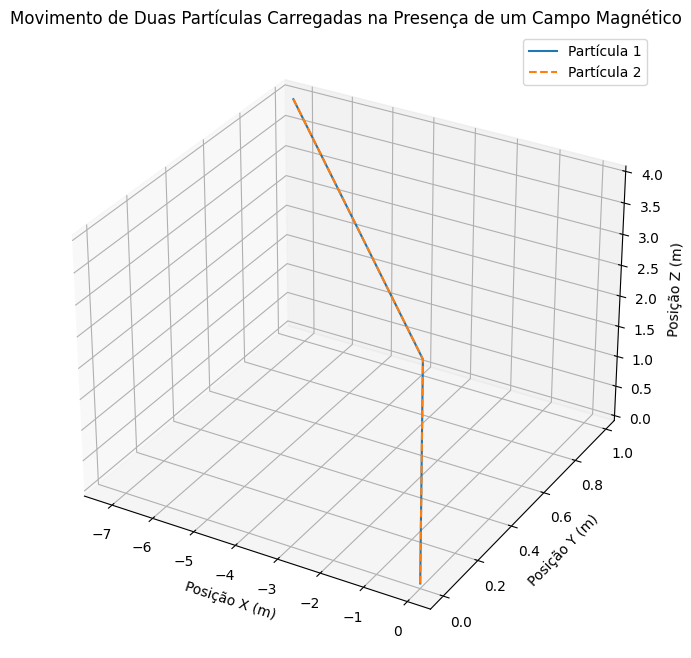

In [185]:
# Plotagem dos resultados em 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(u1[:, 0], u1[:, 1], u1[:, 2], label='Partícula 1')
ax.plot(u2[:, 0], u2[:, 1], u2[:, 2], label='Partícula 2', linestyle='--')
ax.set_xlabel('Posição X (m)')
ax.set_ylabel('Posição Y (m)')
ax.set_zlabel('Posição Z (m)')
ax.set_title('Movimento de Duas Partículas Carregadas na Presença de um Campo Magnético')
ax.legend()
plt.show()

In [186]:
import matplotlib.pyplot as plt
import numpy as np

def rk4(t0, u0, dt, f):
    f1 = f(t0, u0)
    f2 = f(t0 + dt / 2.0, u0 + dt * f1 / 2.0)
    f3 = f(t0 + dt / 2.0, u0 + dt * f2 / 2.0)
    f4 = f(t0 + dt, u0 + dt * f3)
    u1 = u0 + dt * (f1 + 2.0 * f2 + 2.0 * f3 + f4) / 6.0
    return t0 + dt, u1 # Correção aqui: retornar tempo atualizado e estado atualizado

def rk4_test1():
    dt = 5 * 1e-06
    t0 = 0.0
    tmax = 0.02
    u0 = np.array([0.0, -2.6, 0.0, 250.0, 0.0, 0.1])

    t_num = int(2 + (tmax - t0) / dt)
    t = np.zeros(t_num)
    u = np.zeros((t_num, 6))

    i = 0
    t[0] = t0
    u[0, :] = u0

    while True:
        if tmax <= t0:
            break
        t0, u1 = rk4(t0, u0, dt, rk4_test1_f)  # Correção aqui: atualizar tempo e estado
        i = i + 1
        t[i] = t0
        u[i, :] = u1
        u0 = u1

    return t, u

<ipython-input-175-b8f8df7c0499>:11: RuntimeWarning: overflow encountered in double_scalars
  dvydt = (e / m) * (u[5] * B[0] - u[3] * B[2])
<ipython-input-175-b8f8df7c0499>:12: RuntimeWarning: invalid value encountered in double_scalars
  dvzdt = (e / m) * (u[3] * B[1] - u[4] * B[0])


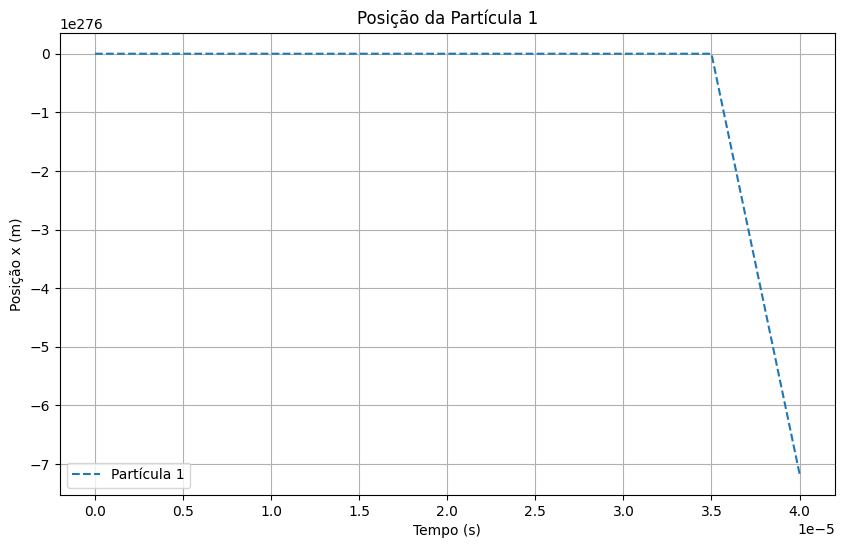

In [187]:
# Simulação para a partícula 1
t1, u1 = rk4_test1()

# Reset das condições iniciais para a partícula 2
u0_particle2 = np.array([0.0, -2.6, 0.0, 250.0, 0.0, 0.1])

# Simulação para a partícula 2
t2, u2 = rk4_test1()

# Plotagem da posição x em função do tempo para ambas as partículas
plt.figure(figsize=(10, 6))
plt.plot(t1, u1[:, 0], label='Partícula 1', linestyle='--')
plt.title('Posição da Partícula 1')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição x (m)')
plt.legend()
plt.grid(True)
plt.show()

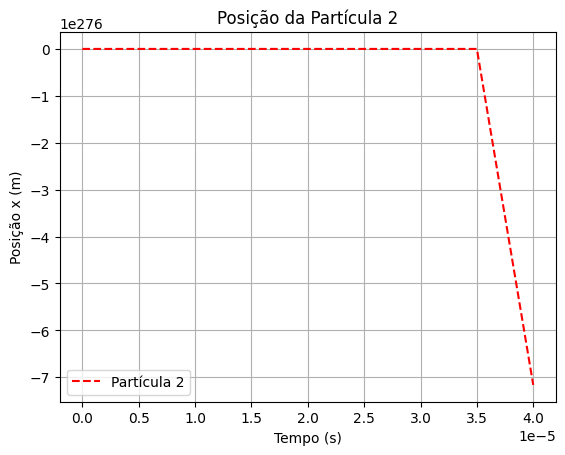

In [188]:
plt.plot(t2 + t1[-1], u2[:, 0], label='Partícula 2', color='r', linestyle='--')
plt.title('Posição da Partícula 2')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição x (m)')
plt.legend()
plt.grid(True)
plt.show()

Ambas as partículas começarão com as mesmas condições iniciais e seguirão trajetórias idênticas no campo magnético. Podemos observar que para a direção x, condiz com o esperado pela imagem.

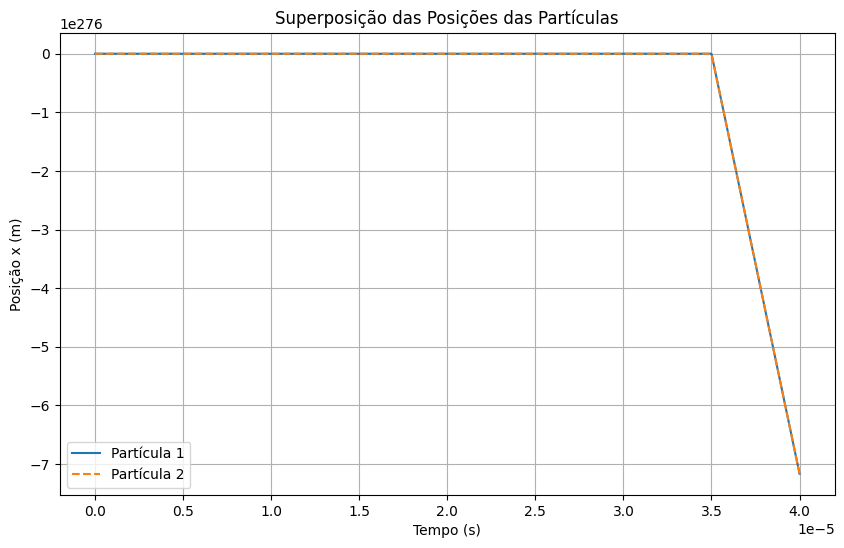

In [189]:
# Superposição das posições das duas partículas
plt.figure(figsize=(10, 6))
plt.plot(t1, u1[:, 0], label='Partícula 1')
plt.plot(t2 + t1[-1], u2[:, 0], label='Partícula 2', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição x (m)')
plt.title('Superposição das Posições das Partículas')
plt.legend()
plt.grid(True)
plt.show()

## Questão 2

Um exemplo de problema em eletromagnetismo que pode ser resolvido usando decomposição LU envolve o cálculo do potencial elétrico em um sistema de condutores.

Considere um sistema de n=3 condutores eletricamente conectados, onde conhecemos as cargas $Q_A, Q_B$ e $Q_C$ em cada condutor e queremos calcular os potenciais elétricos $V_A, V_B$ e $V_C$ em um ponto específico P do espaço.

As distâncias entre os condutores e o ponto P são representadas por $r_{AP}, r_{BP}$ e $r_{CB}$, respectivamente.

O problema pode ser expresso como um sistema de equações lineares usando a lei de Coulomb:
$$
\sum \frac{Q_i}{r_{ij}} = V_j
$$

Valores númericos:
1. Cargas nos condutores: \\
Q_A = 5 Coulumbs \\
Q_B = -3 Coulumbs \\
Q_C = 2 Coulumbs

2. Distâncias entre os condutores e o ponto P: \\
$r_{AP}$ = 2 metros \\
$r_{BP}$ = 3 metros \\
$r_{CP}$ = 4 metros

## Resolução
Este sistema de equações pode ser representado de forma matricial como $\textbf{AV=Q}$, onde:

A é a matriz dos coeficientes das variáveis (distâncias entre os condutores e o ponto), \\
V é o vetor das variáveis desconhecidas (potenciais elétricos nos pontos), \\
Q é o vetor das cargas dos condutores.

Agora, podemos usar a decomposição LU para resolver esse sistema. A decomposição LU de A pode ser escrita como A=LU.

Ao substituir A na equação original, obtemos (LU)V=Q. Então, definindo
UV=Y, podemos resolver os sistemas lineares LY=Q e UV=Y sucessivamente.

A decomposição LU é particularmente útil nesse contexto porque permite resolver o sistema para diferentes conjuntos de cargas Q de maneira mais eficiente do que a resolução direta.

In [16]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.linalg

In [27]:
# Solução do sistema descrito acima
r_AP = 2
r_BP = 3
r_CP = 4
A = np.array([[1/r_AP, 0, 0],[0, 1/r_BP, 0],[0,0,1/r_CP]])
Q = np.array([5, -3, 2])
V = np.linalg.solve(A, Q)

print('Os potenciais encontrados sao')
print('V_1 =', V[0])
print('V_2 =', V[1])
print('V_3 =', V[2])

Os potenciais encontrados sao
V_1 = 10.0
V_2 = -9.0
V_3 = 8.0
